In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
model = unet_planck()

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 6)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    440         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64, 64, 8)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 64, 8)    0           dropout[0][0]                    
______________________________________________________________________________________________

In [4]:
batch_size = 20
min_rad = 0.08

In [5]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, 8, 
                   search_nside=256, min_rad=min_rad)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad)
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                   search_nside=256, min_rad=min_rad)

(1, 64, 64, 6) (1, 64, 64, 1)


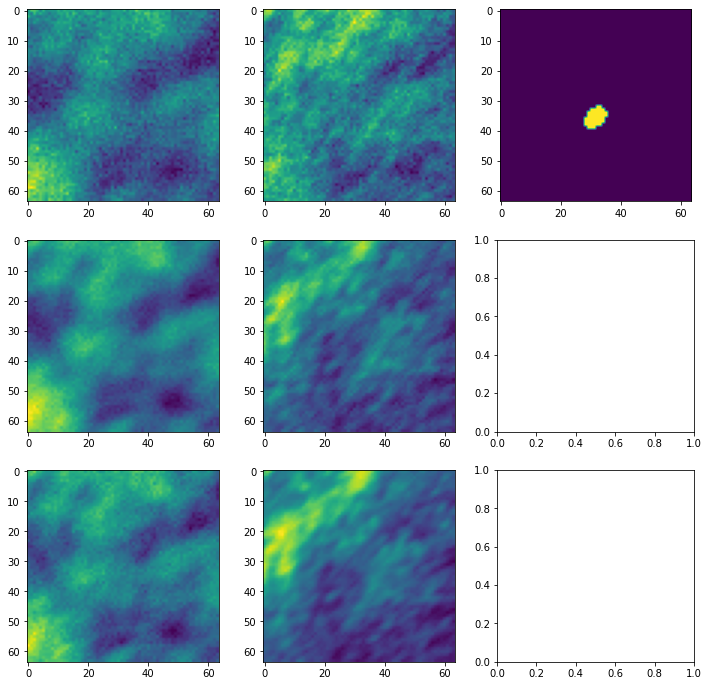

In [6]:
check_gen(test_gen)

In [7]:
filepath='/home/rt2122/Models/planck_z/f8.ep{epoch:04d}-vl{val_loss:.6f}-l{loss:.6f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
callbacks_list = [checkpoint]

In [8]:
model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=100, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.3001 - accuracy: 0.9450 - iou: 0.0095 - dice: 0.0191 
Epoch 00001: val_loss improved from inf to 0.29312, saving model to /home/rt2122/Models/planck_z/f8.ep0001-vl0.293116-l0.300090.h5
50/50 [==============================] - 538s 11s/step - loss: 0.3001 - accuracy: 0.9450 - iou: 0.0095 - dice: 0.0191 - val_loss: 0.2931 - val_accuracy: 0.9858 - val_iou: 0.0138 - val_dice: 0.0277
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9837 - iou: 0.0174 - dice: 0.0347 
Epoch 00002: val_loss did not improve from 0.29312
50/50 [==============================] - 557s 11s/step - loss: 0.1177 - accuracy: 0.9837 - iou: 0.0174 - dice: 0.0347 - val_loss: 0.3031 - val_accuracy: 0.9857 - val_iou: 0.0138 - val_dice: 0.0277
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9857 - i

50/50 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9889 - iou: 0.0762 - dice: 0.1524 
Epoch 00020: val_loss did not improve from 0.06407
50/50 [==============================] - 555s 11s/step - loss: 0.0440 - accuracy: 0.9889 - iou: 0.0762 - dice: 0.1524 - val_loss: 0.0820 - val_accuracy: 0.9858 - val_iou: 0.0368 - val_dice: 0.0736
Epoch 21/100
50/50 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9891 - iou: 0.0801 - dice: 0.1602 
Epoch 00021: val_loss did not improve from 0.06407
50/50 [==============================] - 565s 11s/step - loss: 0.0420 - accuracy: 0.9891 - iou: 0.0801 - dice: 0.1602 - val_loss: 0.0781 - val_accuracy: 0.9871 - val_iou: 0.0481 - val_dice: 0.0962
Epoch 22/100
50/50 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9889 - iou: 0.0808 - dice: 0.1617 
Epoch 00022: val_loss did not improve from 0.06407
50/50 [==============================] - 551s 11s/step - loss: 0.0426 - accuracy: 0.9889

Epoch 41/100
50/50 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9904 - iou: 0.1807 - dice: 0.3614 
Epoch 00041: val_loss did not improve from 0.03291
50/50 [==============================] - 556s 11s/step - loss: 0.0288 - accuracy: 0.9904 - iou: 0.1807 - dice: 0.3614 - val_loss: 0.0330 - val_accuracy: 0.9887 - val_iou: 0.1084 - val_dice: 0.2170
Epoch 42/100
50/50 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9904 - iou: 0.1856 - dice: 0.3712 
Epoch 00042: val_loss did not improve from 0.03291
50/50 [==============================] - 562s 11s/step - loss: 0.0280 - accuracy: 0.9904 - iou: 0.1856 - dice: 0.3712 - val_loss: 0.0426 - val_accuracy: 0.9857 - val_iou: 0.1335 - val_dice: 0.2671
Epoch 43/100
50/50 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9905 - iou: 0.1923 - dice: 0.3847 
Epoch 00043: val_loss improved from 0.03291 to 0.03235, saving model to /home/rt2122/Models/planck_z/f8.ep0043-vl0.032346-l0.0

50/50 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9919 - iou: 0.2848 - dice: 0.5697 
Epoch 00061: val_loss did not improve from 0.02872
50/50 [==============================] - 547s 11s/step - loss: 0.0223 - accuracy: 0.9919 - iou: 0.2848 - dice: 0.5697 - val_loss: 0.0405 - val_accuracy: 0.9903 - val_iou: 0.2005 - val_dice: 0.4010
Epoch 62/100
50/50 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9922 - iou: 0.2938 - dice: 0.5876 
Epoch 00062: val_loss improved from 0.02872 to 0.02075, saving model to /home/rt2122/Models/planck_z/f8.ep0062-vl0.020747-l0.021536.h5
50/50 [==============================] - 559s 11s/step - loss: 0.0215 - accuracy: 0.9922 - iou: 0.2938 - dice: 0.5876 - val_loss: 0.0207 - val_accuracy: 0.9919 - val_iou: 0.2241 - val_dice: 0.4482
Epoch 63/100
50/50 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9920 - iou: 0.2951 - dice: 0.5903 
Epoch 00063: val_loss did not improve from 0.02075
50/5

50/50 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9939 - iou: 0.4035 - dice: 0.8071 
Epoch 00082: val_loss did not improve from 0.01543
50/50 [==============================] - 559s 11s/step - loss: 0.0156 - accuracy: 0.9939 - iou: 0.4035 - dice: 0.8071 - val_loss: 0.0353 - val_accuracy: 0.9892 - val_iou: 0.1982 - val_dice: 0.3966
Epoch 83/100
50/50 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9938 - iou: 0.4064 - dice: 0.8128 
Epoch 00083: val_loss did not improve from 0.01543
50/50 [==============================] - 553s 11s/step - loss: 0.0161 - accuracy: 0.9938 - iou: 0.4064 - dice: 0.8128 - val_loss: 0.0375 - val_accuracy: 0.9897 - val_iou: 0.2535 - val_dice: 0.5071
Epoch 84/100
50/50 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9937 - iou: 0.4118 - dice: 0.8236 
Epoch 00084: val_loss did not improve from 0.01543
50/50 [==============================] - 542s 11s/step - loss: 0.0159 - accuracy: 0.9937

(1, 64, 64, 6) (1, 64, 64, 1)


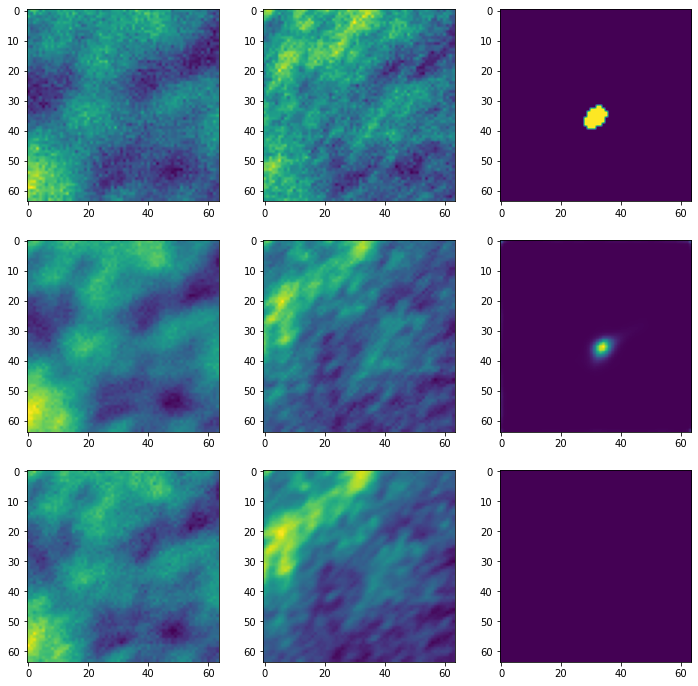

In [9]:
check_gen(test_gen, model)

In [10]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=200, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=100)

Epoch 101/200
20/20 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9946 - iou: 0.4737 - dice: 0.9473 
Epoch 00101: val_loss did not improve from 0.01543
20/20 [==============================] - 224s 11s/step - loss: 0.0135 - accuracy: 0.9946 - iou: 0.4737 - dice: 0.9473 - val_loss: 0.0288 - val_accuracy: 0.9914 - val_iou: 0.2967 - val_dice: 0.5935
Epoch 102/200
20/20 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9944 - iou: 0.4797 - dice: 0.9594 
Epoch 00102: val_loss did not improve from 0.01543
20/20 [==============================] - 221s 11s/step - loss: 0.0135 - accuracy: 0.9944 - iou: 0.4797 - dice: 0.9594 - val_loss: 0.0476 - val_accuracy: 0.9909 - val_iou: 0.3490 - val_dice: 0.6980
Epoch 103/200
20/20 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9949 - iou: 0.4878 - dice: 0.9756 
Epoch 00103: val_loss did not improve from 0.01543
20/20 [==============================] - 226s 11s/step - loss: 0.0126 - 

KeyboardInterrupt: 

(1, 64, 64, 6) (1, 64, 64, 1)


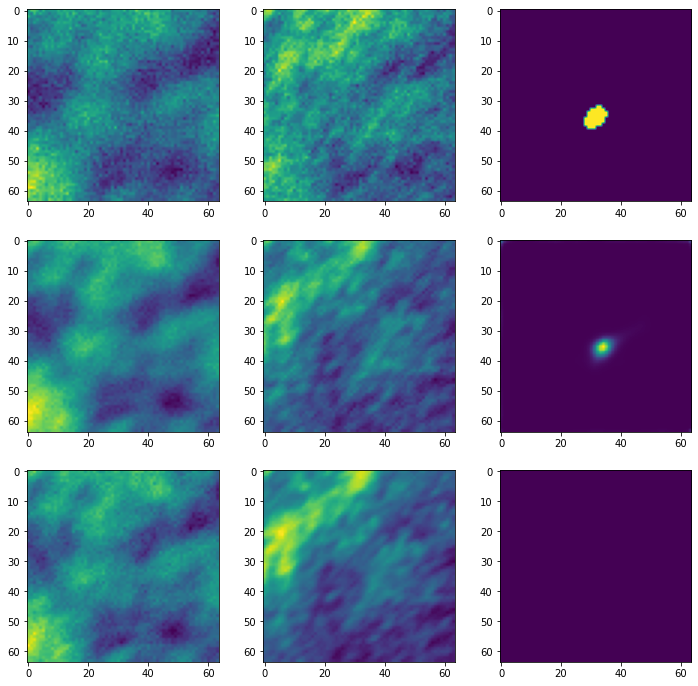

In [12]:
check_gen(test_gen, model)

In [13]:
model.save_weights('/home/rt2122/Models/planck_z/f8.ep110.h5')